In [1]:
from sklearn.tree import DecisionTreeRegressor

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [4]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

In [5]:
import pandas as pd
import seaborn as sns

In [6]:
penguins = sns.load_dataset("penguins")
PremStats = pd.read_csv("../data/EPL_20_21.csv")
penguins = penguins.dropna()


## Portfolio assignment 18
30 min: Train a decision tree to predict one of the numerical columns of your own dataset.
- Split your dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeRegressor. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

In [7]:
PremStats['Position'] = PremStats['Position'].replace(['MF,DF', 'MF,FW'],'MF')
PremStats['Position'] = PremStats['Position'].replace(['FW,MF', 'FW,DF'],'FW')
PremStats['Position'] = PremStats['Position'].replace(['DF,MF', 'DF,FW'],'DF')
PremStats.fillna(0)
PremStats.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,MF,21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [8]:
players_train, players_test = train_test_split(PremStats, test_size=0.3, stratify=PremStats['Position'], random_state=5)
print(players_train.shape, players_test.shape)

(372, 18) (160, 18)


In [9]:
features= ['Yellow_Cards']
dt_regression = DecisionTreeRegressor(max_depth = 3) # Increase max_depth to see effect in the plot
dt_regression.fit(players_train[features], players_train['Yellow_Cards'])

DecisionTreeRegressor(max_depth=3)

In [10]:
predictionsOnTrainset = dt_regression.predict(players_train[features])
predictionsOnTestset = dt_regression.predict(players_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, players_train.Yellow_Cards)
rmseTest = calculate_rmse(predictionsOnTestset, players_test.Yellow_Cards)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 0.3141723613384917
RMSE on test set 0.2669277363289786


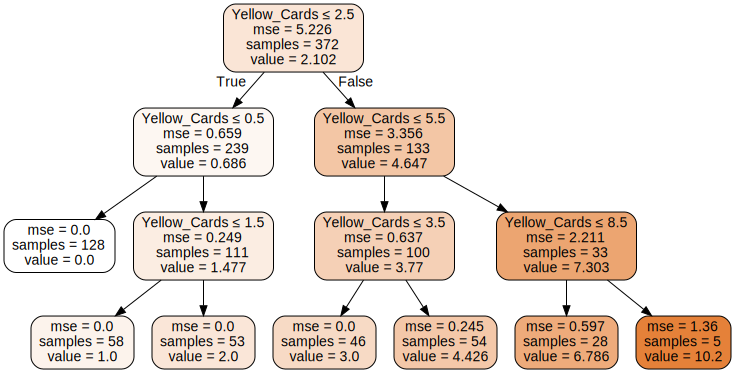

In [11]:
plot_tree_regression(dt_regression, features)